In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [233]:
train_data = pd.read_csv("./COPA/SKT_COPA_Train.tsv", delimiter="\t")
eval_data = pd.read_csv("./COPA/SKT_COPA_Dev.tsv", delimiter="\t")

In [234]:
train_data = train_data[['ID','question','Answer']]
eval_data = eval_data[['ID','question','Answer']]

In [235]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3080 non-null   int64 
 1   question  3080 non-null   object
 2   Answer    3080 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 72.3+ KB


In [236]:
train_data[(train_data['question']=='결과')& (train_data['Answer']==1)]

,ID,question,Answer
0,1,결과,1
1,2,결과,1
6,7,결과,1
8,9,결과,1
20,21,결과,1
...,...,...,...
3065,3066,결과,1
3066,3067,결과,1
3068,3069,결과,1
3072,3073,결과,1


In [237]:
train_data[(train_data['question']=='결과')& (train_data['Answer']==2)]

,ID,question,Answer
2,3,결과,2
4,5,결과,2
5,6,결과,2
10,11,결과,2
12,13,결과,2
...,...,...,...
3053,3054,결과,2
3056,3057,결과,2
3062,3063,결과,2
3063,3064,결과,2


In [238]:
train_data[(train_data['question']=='원인')& (train_data['Answer']==1)]

,ID,question,Answer
3,4,원인,1
15,16,원인,1
16,17,원인,1
17,18,원인,1
27,28,원인,1
...,...,...,...
3046,3047,원인,1
3055,3056,원인,1
3061,3062,원인,1
3070,3071,원인,1


In [239]:
train_data[(train_data['question']=='원인')& (train_data['Answer']==2)]

,ID,question,Answer
7,8,원인,2
9,10,원인,2
11,12,원인,2
13,14,원인,2
14,15,원인,2
...,...,...,...
3071,3072,원인,2
3073,3074,원인,2
3075,3076,원인,2
3078,3079,원인,2


In [240]:
eval_data.groupby(["question", "Answer"])["ID"].count().reset_index()

,question,Answer,ID
0,결과,1,128
1,결과,2,132
2,원인,1,122
3,원인,2,118


In [241]:
plot_data_1 = train_data.groupby(["question", "Answer"])["ID"].count().reset_index()
plot_data_2 = eval_data.groupby(["question", "Answer"])["ID"].count().reset_index()

In [242]:
plot_data_1 = plot_data_1.drop([2,5,6])

In [243]:
plot_data_1

,question,Answer,ID
0,결과,1,792
1,결과,2,757
3,원인,1,870
4,원인,2,655


In [244]:
plot_data_2

,question,Answer,ID
0,결과,1,128
1,결과,2,132
2,원인,1,122
3,원인,2,118


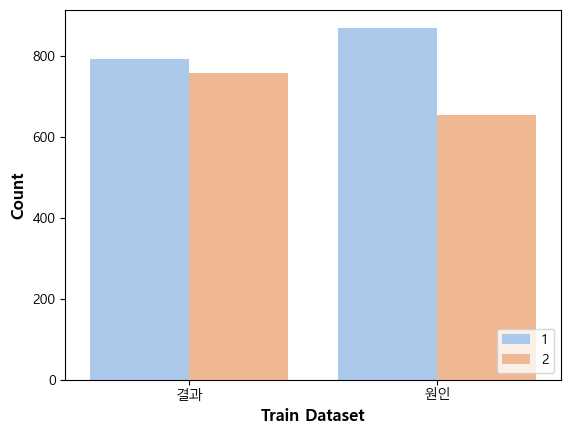

In [245]:
sns.barplot(data=plot_data_1, x ='question', y='ID',hue="Answer",palette = 'pastel')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xlabel('Train Dataset', fontsize=12, fontweight='bold')
plt.show()

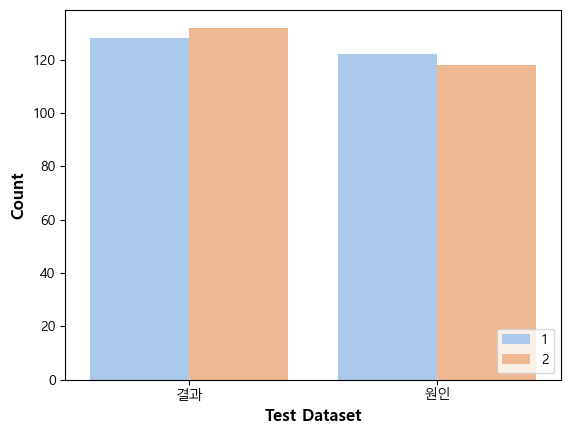

In [246]:
sns.barplot(data=plot_data_2, x ='question', y='ID',hue="Answer",palette = 'pastel')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xlabel('Test Dataset', fontsize=12, fontweight='bold')
plt.show()